# Intro to SML

This is based on the notebook file [01 in Aurélien Geron's github page](https://github.com/ageron/handson-ml)

In [6]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Where to save the figures
PROJECT_ROOT_DIR = "../.."
datapath = PROJECT_ROOT_DIR + "/data/lifesat/"

# Load and prepare Life satisfaction data

In [10]:
# Download CSV from http://stats.oecd.org/index.aspx?DataSetCode=BLI
oecd_bli = pd.read_csv(datapath+"oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli.head()

,"﻿""LOCATION""",Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [12]:
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [13]:
oecd_bli.columns

Index([u'Air pollution', u'Assault rate', u'Consultation on rule-making',
       u'Dwellings without basic facilities', u'Educational attainment',
       u'Employees working very long hours', u'Employment rate',
       u'Homicide rate', u'Household net adjusted disposable income',
       u'Household net financial wealth', u'Housing expenditure',
       u'Job security', u'Life expectancy', u'Life satisfaction',
       u'Long-term unemployment rate', u'Personal earnings',
       u'Quality of support network', u'Rooms per person',
       u'Self-reported health', u'Student skills',
       u'Time devoted to leisure and personal care', u'Voter turnout',
       u'Water quality', u'Years in education'],
      dtype='object', name=u'Indicator')

In [14]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

# Load and prepare GDP per capita data

In [16]:
# Download data from http://goo.gl/j1MSKe (=> imf.org)
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [171]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace="True")
full_country_stats.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0


In [18]:
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]

Indicator
GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [22]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

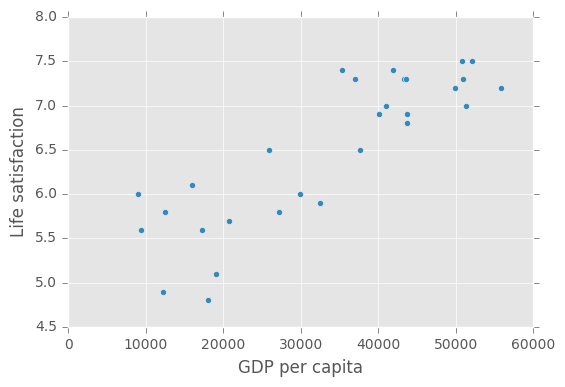

In [23]:
_ = sample_data.plot("GDP per capita",'Life satisfaction',kind='scatter')

## Linear regression to predict Life satisfaction using GDP per capita

Let's make a design matrix and response vector.

In [153]:
x = np.array(sample_data[['GDP per capita']])
n,_ = x.shape
X = np.hstack((np.ones((n,1)),x))
y = np.array(sample_data[['Life satisfaction']])

In [154]:
print(X[0:5,:])

[[  1.00000000e+00   9.05491400e+03]
 [  1.00000000e+00   9.43737200e+03]
 [  1.00000000e+00   1.22398940e+04]
 [  1.00000000e+00   1.24953340e+04]
 [  1.00000000e+00   1.59917360e+04]]


Ordinary least squares is defined by the normal equation
$$X^\top X \hat \beta = X^\top y$$
$$\hat y = X \hat \beta$$
Let's fit the linear model and predict the points.

In [155]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression(fit_intercept=False)
lin1.fit(X,y)
print(lin1.coef_)

[[  4.85305280e+00   4.91154459e-05]]


In [156]:
yhat = lin1.predict(X)
# Compute the training error
RSS = np.sum((y - yhat)**2.)
training_error = RSS / n
print(training_error)

0.180750337058


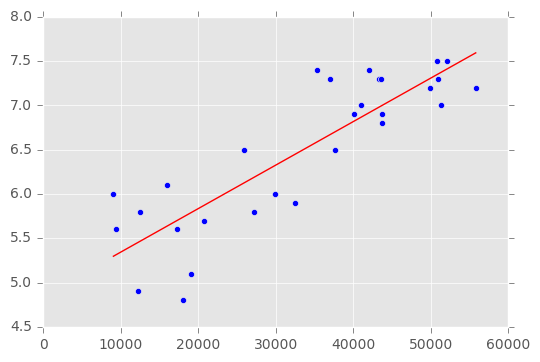

In [157]:
_ = plt.scatter(X[:,1],y)
_ = plt.plot(X[:,1],yhat,'r')

The regression line seems to demonstrate a good fit to a linear model.  We can use it to predict a new point, to assess the impact of a tax policy for example.

## Quadratic Regression

In [158]:
X_quad = np.hstack((np.ones((n,1)),x,x**2))

In the above, we add a quadratic term to the design matrix, to see if it improves the fit.

In [160]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression(fit_intercept=False)
lin1.fit(X_quad,y)
yhat = lin1.predict(X_quad)
# Compute the training error
RSS = np.sum((y - yhat)**2.)
training_error = RSS / n
print(training_error)

0.180750328106


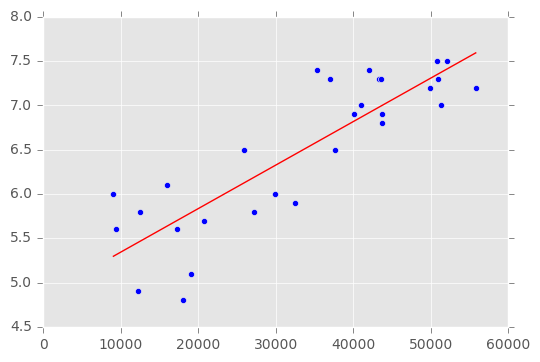

In [166]:
_ = plt.scatter(X[:,1],y)
_ = plt.plot(X[:,1],yhat,'r')

The fits are essentially the same between linear and quadratic fit, and the training risk is nearly equal.

## Leave-one-out prediction simulation

In this section, I show that the training risk is an optimistic measure of the true risk.

In [162]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(X)

29L

In [163]:
loo_losses = []
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lin1.fit(X_train,y_train)
    y_hat = lin1.predict(X_test)
    loss = np.sum((y_hat - y_test)**2)
    loo_losses.append(loss)
    print("TEST: " + sample_data.index.values[test_index][0] + " " + str(loss))

TEST: Russia 0.656051053088
TEST: Turkey 0.106122973959
TEST: Hungary 0.386850821831
TEST: Poland 0.139294646487
TEST: Slovak Republic 0.254321170216
TEST: Estonia 0.012268654247
TEST: Greece 1.03015507777
TEST: Portugal 0.552074953721
TEST: Slovenia 0.0333053896927
TEST: Spain 0.155145884444
TEST: Korea 0.164287129022
TEST: Italy 0.110291585405
TEST: Japan 0.322928438477
TEST: Israel 0.70654294272
TEST: New Zealand 0.424294250555
TEST: France 0.0446954750004
TEST: Belgium 0.00647553607731
TEST: Germany 0.0194713737991
TEST: Finland 0.259258626447
TEST: Canada 0.112746874353
TEST: Netherlands 0.103718848674
TEST: Austria 0.0112620289316
TEST: United Kingdom 0.0458343991046
TEST: Sweden 0.01234451111
TEST: Iceland 0.0266024290796
TEST: Australia 0.00376175623872
TEST: Ireland 0.169279975496
TEST: Denmark 0.0092682854447
TEST: United States 0.19953640348


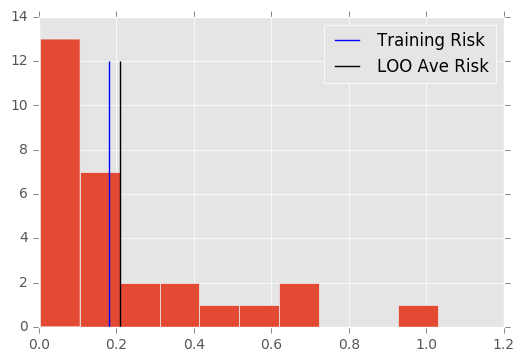

In [167]:
plt.hist(loo_losses)
plt.vlines(training_error,0,12,'b',label="Training Risk")
plt.vlines(np.mean(loo_losses),0,12,'k',label="LOO Ave Risk")
_ = plt.legend()

This histogram of the leave-one-out errors demonstrates that the training risk can be optimistic, because the Leave-one-out risk (the average of the LOO errors) is larger than the training risk.

In [168]:
def loo_risk(X,y):
    """
    Construct the leave-one-out square error risk for the linear model
    
    Input: design matrix, X, response vector, y
    Output: scalar LOO risk
    """
    loo = LeaveOneOut()
    loo.get_n_splits(X)
    loo_losses = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        lin1.fit(X_train,y_train)
        y_hat = lin1.predict(X_test)
        loss = np.sum((y_hat - y_test)**2)
        loo_losses.append(loss)
    return np.mean(loo_losses)

In [169]:
help(loo_risk)

Help on function loo_risk in module __main__:

loo_risk(X, y)
    Construct the leave-one-out square error risk for the linear model
    
    Input: design matrix, X, response vector, y
    Output: scalar LOO risk



In [170]:
print("Linear LOO risk: {}".format(loo_risk(X,y)))
print("Quadratic LOO risk: {}".format(loo_risk(X_quad,y)))

Linear LOO risk: 0.209592810168
Quadratic LOO risk: 0.230390450851
